### Question-3

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random

In [2]:
with open('data2.txt') as i:
    lines = [line.rstrip('\n') for line in i]
print(lines)

['6.1101,17.592', '5.5277,9.1302', '8.5186,13.662', '7.0032,11.854', '5.8598,6.8233', '8.3829,11.886', '7.4764,4.3483', '8.5781,12', '6.4862,6.5987', '5.0546,3.8166', '5.7107,3.2522', '14.164,15.505', '5.734,3.1551', '8.4084,7.2258', '5.6407,0.71618', '5.3794,3.5129', '6.3654,5.3048', '5.1301,0.56077', '6.4296,3.6518', '7.0708,5.3893', '6.1891,3.1386', '20.27,21.767', '5.4901,4.263', '6.3261,5.1875', '5.5649,3.0825', '18.945,22.638', '12.828,13.501', '10.957,7.0467', '13.176,14.692', '22.203,24.147', '5.2524,-1.22', '6.5894,5.9966', '9.2482,12.134', '5.8918,1.8495', '8.2111,6.5426', '7.9334,4.5623', '8.0959,4.1164', '5.6063,3.3928', '12.836,10.117', '6.3534,5.4974', '5.4069,0.55657', '6.8825,3.9115', '11.708,5.3854', '5.7737,2.4406', '7.8247,6.7318', '7.0931,1.0463', '5.0702,5.1337', '5.8014,1.844', '11.7,8.0043', '5.5416,1.0179', '7.5402,6.7504', '5.3077,1.8396', '7.4239,4.2885', '7.6031,4.9981', '6.3328,1.4233', '6.3589,-1.4211', '6.2742,2.4756', '5.6397,4.6042', '9.3102,3.9624', '9.

In [3]:
x=[]
y=[]
for i in range(len(lines)):
    update=lines[i].split(',')
    x.append(update[0])
    y.append(update[1])

In [4]:
x_data=[]
y_data=[]
for i in range(len(x)):
    x_data.append(float(x[i]))
    y_data.append(float(y[i]))

In [5]:
data=pd.DataFrame(data=x_data,columns=['x'])
data['y']=pd.DataFrame(y_data)
data

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


#### 1-Plotting the Data

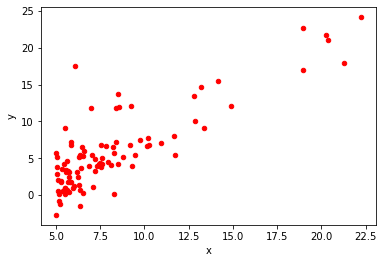

In [6]:
x = data['x'].values
y = data['y'].values
data.plot(kind='scatter',x='x',y='y',color='red')
plt.show()

#### 2-Normal Equation

In [7]:
bias = np.ones((len(data['x'].values),1))
x = data['x'].values
x = np.reshape(x,(len(data['x'].values),1))
x = np.append(bias,x,axis=1)
y = data['y'].values
w = (np.linalg.inv(np.transpose(x).dot(x))).dot(np.transpose(x).dot(y))
print('w Values')
print('-------------------------')
print(w)

w Values
-------------------------
[-3.89578088  1.19303364]


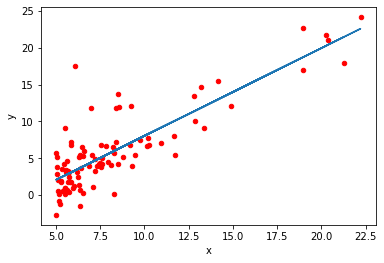

In [8]:
function_values=[]
for i in data['x'].values:
    y_new=w[0]+w[1]*i
    function_values.append(y_new)
    
data.plot(kind='scatter',x='x',y='y',color='red')
plt.plot(data['x'].values,function_values)
plt.show()

#### 3-Batch Gradient Descent and Stochastic Gradient Descent
##### a-Splitting the Dataset

In [9]:
m = len(x)
x = np.reshape(data['x'].values,(m,1))
y = np.reshape(data['y'].values,(m,1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print('Size of the Training and the Testing Sets')
print('x_train--->',np.size(x_train))
print('y_train--->',np.size(y_train))

print('x_test--->',np.size(x_test))
print('y_test--->',np.size(y_test))

Size of the Training and the Testing Sets
x_train---> 77
y_train---> 77
x_test---> 20
y_test---> 20


In [10]:
def MSE(w,x,y):
    MSE_value= (1/(2 * (len(x))))*np.sum(np.power((np.dot(x, w) - y),2))
    return MSE_value

##### b- Plot MSE vs. Iteration
###### Batch Gradient Descent

In [11]:
def BatchGradientDescent(x,y,w,learning_rate,iterations):
    m = len(y)
    MSE_value_store = np.zeros(iterations)
    w_store = np.zeros((iterations,2))
    
    for i in range(iterations):
        y_new = np.dot(x,w)
        w = w -(1/m)*learning_rate*( x.T.dot((y_new - y)))
        w_store[i,:] = w.T
        MSE_value_store[i]  = MSE(w,x,y)
        
    return w, MSE_value_store, w_store

In [18]:
learning_rate =0.01
maximum_iteretion = 2000
w = np.random.randn(2,1)

x_bias_train = np.c_[np.ones((len(x_train),1)),x_train]
x_bias_test = np.c_[np.ones((len(x_test),1)),x_test]

w_train,MSE_value_store_train,w_store_train = BatchGradientDescent(x_bias_train,y_train,w,learning_rate,maximum_iteretion)
w_test,MSE_value_store_test,w_store_test = BatchGradientDescent(x_bias_test,y_test,w,learning_rate,maximum_iteretion)
print('w0_train:   ',w_train[0][0],'w0_test:   ',w_test[0][0])
print('w1_train:   ',w_train[1][0],'w1_test:   ',w_test[1][0])
print('MSE_value_train:  ',MSE_value_store_train[-1],'|','MSE_value_test:  ',MSE_value_store_test[-1])
print('-----------------------------------------------------------------------------------------')
for i in range(maximum_iteretion):
    print("Iterations:",i,'--'," MSE_value_train:",MSE_value_store_train[i],'---'," MSE_value_test:", MSE_value_store_test[i])

w0_train:    -3.4961380088493126 w0_test:    -5.184576762746231
w1_train:    1.1527428198900387 w1_test:    1.3587835044251406
MSE_value_train:   4.624016172375189 | MSE_value_test:   3.654591787055396
-----------------------------------------------------------------------------------------
Iterations: 0 --  MSE_value_train: 8.78579153106552 ---  MSE_value_test: 18.650712740807247
Iterations: 1 --  MSE_value_train: 7.184184658640117 ---  MSE_value_test: 8.252266300783095
Iterations: 2 --  MSE_value_train: 7.149190953168421 ---  MSE_value_test: 6.763789987079261
Iterations: 3 --  MSE_value_train: 7.139003735566818 ---  MSE_value_test: 6.546619107984938
Iterations: 4 --  MSE_value_train: 7.129246059823099 ---  MSE_value_test: 6.510850341148411
Iterations: 5 --  MSE_value_train: 7.119532368476704 ---  MSE_value_test: 6.500973605360741
Iterations: 6 --  MSE_value_train: 7.109856421507343 ---  MSE_value_test: 6.4948003255783995
Iterations: 7 --  MSE_value_train: 7.100217976668099 ---  MSE_v

Iterations: 474 --  MSE_value_train: 5.026956842162366 ---  MSE_value_test: 4.777248574567346
Iterations: 475 --  MSE_value_train: 5.0253909881016625 ---  MSE_value_test: 4.774981243870361
Iterations: 476 --  MSE_value_train: 5.023831202744004 ---  MSE_value_test: 4.772718244317049
Iterations: 477 --  MSE_value_train: 5.022277462569214 ---  MSE_value_test: 4.770459567633891
Iterations: 478 --  MSE_value_train: 5.0207297441482766 ---  MSE_value_test: 4.76820520556317
Iterations: 479 --  MSE_value_train: 5.01918802414298 ---  MSE_value_test: 4.765955149862946
Iterations: 480 --  MSE_value_train: 5.017652279305563 ---  MSE_value_test: 4.763709392307023
Iterations: 481 --  MSE_value_train: 5.01612248647836 ---  MSE_value_test: 4.761467924684914
Iterations: 482 --  MSE_value_train: 5.014598622593464 ---  MSE_value_test: 4.759230738801826
Iterations: 483 --  MSE_value_train: 5.013080664672362 ---  MSE_value_test: 4.7569978264786075
Iterations: 484 --  MSE_value_train: 5.011568589825605 ---  

Iterations: 971 --  MSE_value_train: 4.681580067339844 ---  MSE_value_test: 4.049213481095646
Iterations: 972 --  MSE_value_train: 4.681352772942149 ---  MSE_value_test: 4.04833687147575
Iterations: 973 --  MSE_value_train: 4.681126359458094 ---  MSE_value_test: 4.047461936389797
Iterations: 974 --  MSE_value_train: 4.680900823473569 ---  MSE_value_test: 4.0465886726390226
Iterations: 975 --  MSE_value_train: 4.68067616158769 ---  MSE_value_test: 4.045717077030782
Iterations: 976 --  MSE_value_train: 4.680452370412755 ---  MSE_value_test: 4.0448471463785225
Iterations: 977 --  MSE_value_train: 4.680229446574195 ---  MSE_value_test: 4.04397887750178
Iterations: 978 --  MSE_value_train: 4.6800073867105185 ---  MSE_value_test: 4.043112267226164
Iterations: 979 --  MSE_value_train: 4.679786187473258 ---  MSE_value_test: 4.042247312383352
Iterations: 980 --  MSE_value_train: 4.679565845526928 ---  MSE_value_test: 4.041384009811074
Iterations: 981 --  MSE_value_train: 4.679346357548968 ---  

Iterations: 1411 --  MSE_value_train: 4.6335553563103264 ---  MSE_value_test: 3.788166010506681
Iterations: 1412 --  MSE_value_train: 4.633514188906968 ---  MSE_value_test: 3.7877880639632266
Iterations: 1413 --  MSE_value_train: 4.633473181054075 ---  MSE_value_test: 3.787410839388027
Iterations: 1414 --  MSE_value_train: 4.633432332133289 ---  MSE_value_test: 3.787034335401947
Iterations: 1415 --  MSE_value_train: 4.633391641528642 ---  MSE_value_test: 3.7866585506284887
Iterations: 1416 --  MSE_value_train: 4.633351108626554 ---  MSE_value_test: 3.786283483693786
Iterations: 1417 --  MSE_value_train: 4.63331073281583 ---  MSE_value_test: 3.7859091332265944
Iterations: 1418 --  MSE_value_train: 4.633270513487636 ---  MSE_value_test: 3.785535497858289
Iterations: 1419 --  MSE_value_train: 4.633230450035498 ---  MSE_value_test: 3.7851625762228616
Iterations: 1420 --  MSE_value_train: 4.633190541855301 ---  MSE_value_test: 3.7847903669569107
Iterations: 1421 --  MSE_value_train: 4.63315

Iterations: 1911 --  MSE_value_train: 4.624457300454727 ---  MSE_value_test: 3.6663706390856974
Iterations: 1912 --  MSE_value_train: 4.62445139393591 ---  MSE_value_test: 3.666225350818811
Iterations: 1913 --  MSE_value_train: 4.6244455103086946 ---  MSE_value_test: 3.666080340087248
Iterations: 1914 --  MSE_value_train: 4.624439649484361 ---  MSE_value_test: 3.665935606360849
Iterations: 1915 --  MSE_value_train: 4.624433811374536 ---  MSE_value_test: 3.6657911491104684
Iterations: 1916 --  MSE_value_train: 4.624427995891183 ---  MSE_value_test: 3.6656469678079717
Iterations: 1917 --  MSE_value_train: 4.624422202946611 ---  MSE_value_test: 3.6655030619262314
Iterations: 1918 --  MSE_value_train: 4.624416432453468 ---  MSE_value_test: 3.6653594309391266
Iterations: 1919 --  MSE_value_train: 4.624410684324739 ---  MSE_value_test: 3.6652160743215463
Iterations: 1920 --  MSE_value_train: 4.624404958473747 ---  MSE_value_test: 3.665072991549376
Iterations: 1921 --  MSE_value_train: 4.6243

###### b-Batch Gradient Descent : MSE vs Iteration Plot

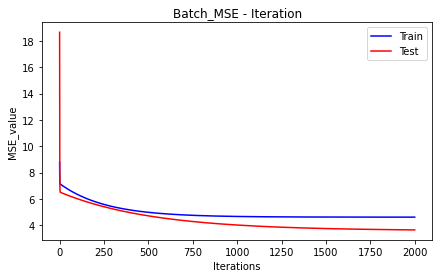

In [19]:
fig,ax = plt.subplots(figsize=(7,4))
ax.plot(range(maximum_iteretion),MSE_value_store_train,'b-', label='Train')
ax.plot(range(maximum_iteretion),MSE_value_store_test,'r-', label='Test')
ax.set_ylabel('MSE_value')
ax.set_xlabel('Iterations')
ax.set_title('Batch_MSE - Iteration')
plt.legend()
plt.show()

In [28]:
learning_rate_list = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]

MSE_Batch_Train= []
MSE_Batch_Test= []

for i in learning_rate_list:
    maximum_iteretion =  2000
    w = np.random.randn(2,1)
    x_bias_train = np.c_[np.ones((len(x_train),1)),x_train]
    x_bias_test = np.c_[np.ones((len(x_test),1)),x_test]


    w_train,MSE_value_store_train,w_store_train = BatchGradientDescent(x_bias_train,y_train,w,learning_rate,maximum_iteretion)
    w_test,MSE_value_store_test,w_store_test = BatchGradientDescent(x_bias_test,y_test,w,learning_rate,maximum_iteretion)
    
    MSE_Batch_Train.append(MSE_value_store_train[maximum_iteretion-1])
    MSE_Batch_Test.append(MSE_value_store_test[maximum_iteretion-1])
    
    print('Learning Rate= ',i,'|','MSE_value Train =',MSE_value_store_train[maximum_iteretion-1],'MSE_value Test =',MSE_value_store_test[maximum_iteretion-1])

Learning Rate=  0.01 | MSE_value Train = 4.623512034312272 MSE_value Test = 3.6345782490686376
Learning Rate=  0.02 | MSE_value Train = 4.623381481223269 MSE_value Test = 3.6288282208920246
Learning Rate=  0.03 | MSE_value Train = 4.623134325436516 MSE_value Test = 3.6161652194444245
Learning Rate=  0.04 | MSE_value Train = 4.623487189760673 MSE_value Test = 3.6340268735384917
Learning Rate=  0.05 | MSE_value Train = 4.62351324441235 MSE_value Test = 3.635053246724794
Learning Rate=  0.06 | MSE_value Train = 4.623441001586472 MSE_value Test = 3.631780249325287
Learning Rate=  0.07 | MSE_value Train = 4.623525468247504 MSE_value Test = 3.6353511170996864
Learning Rate=  0.08 | MSE_value Train = 4.623608679288163 MSE_value Test = 3.6391258388968666
Learning Rate=  0.09 | MSE_value Train = 4.623207225742558 MSE_value Test = 3.6199427523718377
Learning Rate=  0.1 | MSE_value Train = 4.623014158917707 MSE_value Test = 3.6085941430938777


###### c-Batch Gradient Descent: MSE vs Learning Rate Plot

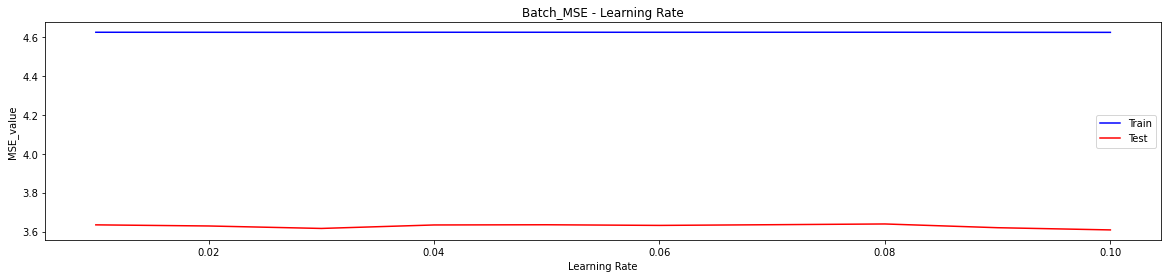

In [29]:
fig,ax = plt.subplots(figsize=(20,4))
ax.plot(learning_rate_list,MSE_Batch_Train,'b-',label='Train')
ax.plot(learning_rate_list,MSE_Batch_Test,'r-',label='Test')
plt.xlabel('Learning Rate')
plt.ylabel('MSE_value')
plt.title('Batch_MSE - Learning Rate')
plt.legend()
plt.show()

###### Stochastic Gradient Descent

In [30]:
def StochasticGradientDescent(x,y,w,learning_rate,iterations):
    m = len(y)
    MSE_value_store = np.zeros(iterations) 
    for it in range(iterations):
        MSE_value =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            x_i = x[rand_ind,:].reshape(1,x.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(x_i,w)

            w = w -(1/m)*learning_rate*( x_i.T.dot((prediction - y_i)))
            MSE_value += MSE(w,x_i,y_i)
        MSE_value_store[it]  = MSE_value
        
    return w, MSE_value_store

In [31]:
learning_rate =0.01
maximum_iteretion = 1500
w = np.random.randn(2,1)
x_bias_train = np.c_[np.ones((len(x_train),1)),x_train]
x_bias_test = np.c_[np.ones((len(x_test),1)),x_test]

w_train,MSE_value_store_train = StochasticGradientDescent(x_bias_train,y_train,w,learning_rate,maximum_iteretion)
w_test,MSE_value_store_test = StochasticGradientDescent(x_bias_test,y_test,w,learning_rate,maximum_iteretion)
print('w0_train:   ',w_train[0][0],'w0_test:   ',w_test[0][0])
print('w1_train:   ',w_train[1][0],'w1_test:   ',w_test[1][0])
print('MSE_value_train:  ',MSE_value_store_train[-1],'|','MSE_value_test:  ',MSE_value_store_test[-1])
print('-------------------------')
for i in range(maximum_iteretion):
    print("Iterations: ",i,"--MSE_value_train= ",MSE_value_store_train[i],"---MSE_value_test= ", MSE_value_store_test[i])
        

w0_train:    -3.3681319435412567 w0_test:    -4.676294877039438
w1_train:    1.156061260219066 w1_test:    1.3106620820191972
MSE_value_train:   294.3105357952917 | MSE_value_test:   133.6622057265912
-------------------------
Iterations:  0 --MSE_value_train=  4988.118052072728 ---MSE_value_test=  1087.7295128952283
Iterations:  1 --MSE_value_train=  1379.5148682170611 ---MSE_value_test=  280.19958538963874
Iterations:  2 --MSE_value_train=  414.34103118728166 ---MSE_value_test=  266.27911924943834
Iterations:  3 --MSE_value_train=  465.5042328507546 ---MSE_value_test=  150.59842600385116
Iterations:  4 --MSE_value_train=  540.3928218973847 ---MSE_value_test=  135.88383986022043
Iterations:  5 --MSE_value_train=  541.5238679680931 ---MSE_value_test=  94.09558219251693
Iterations:  6 --MSE_value_train=  493.44520598853865 ---MSE_value_test=  66.169027676508
Iterations:  7 --MSE_value_train=  463.3873580476709 ---MSE_value_test=  94.78048712729185
Iterations:  8 --MSE_value_train=  407.

Iterations:  644 --MSE_value_train=  367.32261450491535 ---MSE_value_test=  72.56260035130072
Iterations:  645 --MSE_value_train=  303.67053102206063 ---MSE_value_test=  72.7835933667412
Iterations:  646 --MSE_value_train=  189.87977681862012 ---MSE_value_test=  99.95140068867997
Iterations:  647 --MSE_value_train=  441.1185444905574 ---MSE_value_test=  56.04510646941976
Iterations:  648 --MSE_value_train=  429.07758892484713 ---MSE_value_test=  77.67499447531229
Iterations:  649 --MSE_value_train=  359.0354702356623 ---MSE_value_test=  52.274985803715616
Iterations:  650 --MSE_value_train=  336.70572884417476 ---MSE_value_test=  84.60041772688518
Iterations:  651 --MSE_value_train=  272.1127459733367 ---MSE_value_test=  64.24094350326074
Iterations:  652 --MSE_value_train=  245.0625918081339 ---MSE_value_test=  55.58469060759708
Iterations:  653 --MSE_value_train=  372.1468698026586 ---MSE_value_test=  53.08849297290549
Iterations:  654 --MSE_value_train=  457.350274742492 ---MSE_valu

Iterations:  1161 --MSE_value_train=  341.748422500606 ---MSE_value_test=  65.56323122168946
Iterations:  1162 --MSE_value_train=  292.8696991201321 ---MSE_value_test=  98.32740407969355
Iterations:  1163 --MSE_value_train=  211.95481717732088 ---MSE_value_test=  55.977747791009
Iterations:  1164 --MSE_value_train=  339.7585958216416 ---MSE_value_test=  59.95463590333416
Iterations:  1165 --MSE_value_train=  396.5255186608652 ---MSE_value_test=  77.40405326387273
Iterations:  1166 --MSE_value_train=  517.4455221770457 ---MSE_value_test=  72.75590942690734
Iterations:  1167 --MSE_value_train=  418.86900710883083 ---MSE_value_test=  48.17466175415346
Iterations:  1168 --MSE_value_train=  236.61711677888974 ---MSE_value_test=  59.626697820012154
Iterations:  1169 --MSE_value_train=  341.1526628634027 ---MSE_value_test=  44.02146652412965
Iterations:  1170 --MSE_value_train=  367.5963138085384 ---MSE_value_test=  42.64801428009814
Iterations:  1171 --MSE_value_train=  217.4838192103023 ---

###### b- Stochastic Gradient Descent: MSE vs Iteration Plot

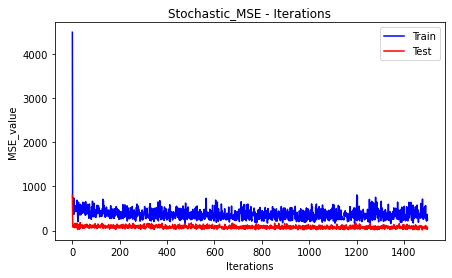

In [25]:
fig,ax = plt.subplots(figsize=(7,4))
ax.plot(range(maximum_iteretion),MSE_value_store_train,'b-',label='Train')
ax.plot(range(maximum_iteretion),MSE_value_store_test,'r-',label='Test')
ax.set_ylabel('MSE_value')
ax.set_xlabel('Iterations')
ax.set_title('Stochastic_MSE - Iterations')
plt.legend()
plt.show()

In [26]:
learning_rate_list = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]

MSE_Stochastic_Train= []
MSE_Stochastic_Test= []

for i in learning_rate_list:
    maximum_iteretion = 2000
    w = np.random.randn(2,1)
    
    x_bias_train = np.c_[np.ones((len(x_train),1)),x_train]
    x_bias_test = np.c_[np.ones((len(x_test),1)),x_test]
    
    w_train,MSE_value_store_train = StochasticGradientDescent(x_bias_train,y_train,w,learning_rate,maximum_iteretion)
    w_test,MSE_value_store_test = StochasticGradientDescent(x_bias_test,y_test,w,learning_rate,maximum_iteretion)
    
    MSE_Stochastic_Train.append(MSE_value_store_train[maximum_iteretion-1])
    MSE_Stochastic_Test.append(MSE_value_store_test[maximum_iteretion-1])
    
    print('Learning Rate= ',i,'|','MSE_value Train = ',MSE_value_store_train[maximum_iteretion-1],'|','MSE_value Test= ',MSE_value_store_test[maximum_iteretion-1])

Learning Rate=  0.01 | MSE_value Train =  266.67311447823363 | MSE_value Test=  81.28980029291829
Learning Rate=  0.02 | MSE_value Train =  307.7470643002951 | MSE_value Test=  115.34963830107915
Learning Rate=  0.03 | MSE_value Train =  355.59716274671473 | MSE_value Test=  88.57331730210223
Learning Rate=  0.04 | MSE_value Train =  194.5572732675524 | MSE_value Test=  67.35895482881702
Learning Rate=  0.05 | MSE_value Train =  394.5908581523029 | MSE_value Test=  93.95642577557349
Learning Rate=  0.06 | MSE_value Train =  238.15220143883718 | MSE_value Test=  95.60401311366199
Learning Rate=  0.07 | MSE_value Train =  378.02254823364524 | MSE_value Test=  119.95047220906186
Learning Rate=  0.08 | MSE_value Train =  346.5791839109339 | MSE_value Test=  57.34194125587714
Learning Rate=  0.09 | MSE_value Train =  401.1400201019469 | MSE_value Test=  107.24549445026634
Learning Rate=  0.1 | MSE_value Train =  372.4007304596858 | MSE_value Test=  43.052040675031876


###### c-Stochastic Gradient Descent: MSE vs Learning Rate Plot

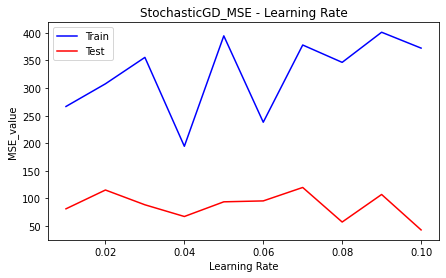

In [27]:
fig,ax = plt.subplots(figsize=(7,4))
ax.plot(learning_rate_list,MSE_Stochastic_Train,'b-',label='Train')
ax.plot(learning_rate_list,MSE_Stochastic_Test,'r-',label='Test')
ax.set_ylabel('MSE_value')
ax.set_xlabel('Learning Rate')
ax.set_title('StochasticGD_MSE - Learning Rate')
plt.legend()
plt.show()

##### b- Discussion About Batch and Stochastic Modes:
If we compare MSE-Iteration graphs, we can see that Batch Gradient Descent (BGD) needs a smaller number of iterations than Stochastic Gradient Descent (SGD) to reach the optimum MSE value. SGD chooses random samples to calculate gradient because it sometimes goes to the wrong searching direction, and as we can see on the  MSE-Iteration graph of BDG, it converges smoother than SDG. SDG comes in handy if we have a really large data set, and it might perform better than BDG in terms of the need for computational power; however, it is not so accurate and useful in the small data set.

If we compare BDG and SGD in terms of accuracy, we can see that BDG is more accurate than SDG. Because if we compare the MSE values, we can see that BDG gives MSE become almost constant after 491 iterations on training samples. However, MSE values of SDG change between 200 to 500 and never get constant.

Training samples and test samples behave similarly, but as we expected, the number of test samples is less than the number of training samples. That's why it is normal that when we calculate cost function MSE using test samples, it gives a smaller error.


##### c- Choosing Best Learning Rate
Best Learning Rate for BDG is can be any number between 0.01-0.1 however in terms of iteration number we can pick 0.1 because almost all of them perform similir as we can see on the MSE - Learning Rate grapg both trainin and test samples shown as almost straight line.

Best Learning Rate for SDG is can be 0.04 because it almost gives the minimum error for trainin and test samples.

